In [4]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Synthetic data generation for bank customer wait times in Bangladesh
banks = [
    "Sonali Bank",
    "Janata Bank",
    "Agrani Bank",
    "Rupali Bank",
    "BRAC Bank",
    "Dutch-Bangla Bank",
    "Islami Bank",
    "UCB",
    "Eastern Bank",
    "NCC Bank",
    "Prime Bank",
    "AB Bank",
    "Bank Asia",
    "Jamuna Bank",
    "NRB Commercial Bank",
]

divisions = [
    "Dhaka",
    "Chattogram",
    "Rajshahi",
    "Khulna",
    "Barishal",
    "Sylhet",
    "Rangpur",
    "Mymensingh",
]


service_types = {
    "Cash Deposit": (3, 5),
    "Cash Withdrawal": (2, 4),
    "Cheque Deposit": (5, 7),
    "New Account Opening": (25, 40),
    "Loan Repayment": (5, 10),
    "Inward Remittance": (10, 20),
    "Debit Card Reissue": (8, 15),
    "FD Opening": (10, 20),
    "Locker Access": (7, 15),
}


def random_service_time(service):
    low, high = service_types[service]
    return round(np.random.triangular(low, (low + high) // 2, high), 2)


def generate_customer_data(bank, branch, date, num_customers=50):
    data = []
    base_time = datetime.combine(date, datetime.min.time()) + timedelta(hours=9)  # 9 AM
    for _ in range(num_customers):
        arrival_offset = timedelta(minutes=random.randint(0, 480))  # 9 AM – 5 PM
        arrival = base_time + arrival_offset

        service = random.choice(list(service_types.keys()))
        service_duration = random_service_time(service)

        wait_time = max(1, np.random.poisson(5))  # Poisson wait
        start = arrival + timedelta(minutes=wait_time)
        end = start + timedelta(minutes=service_duration)

        data.append(
            {
                "bank": bank,
                "branch": branch,
                "date": arrival.date(),
                "day": arrival.strftime("%A"),
                "arrival_time": arrival.time(),
                "service_type": service,
                "service_start_time": start.time(),
                "service_end_time": end.time(),
                "wait_time_min": wait_time,
                "service_duration_min": round(service_duration, 2),
                "queue_length": random.randint(1, 15),
            }
        )
    return data


# Generate data for 15 banks × 3 branches × 50 customers = 2250 rows
all_data = []
date = datetime(2025, 8, 4).date()

for bank in banks:
    for i in range(3):  # 3 branches per bank
        division = random.choice(divisions)
        branch_name = f"{bank}, {division} Branch"
        all_data.extend(generate_customer_data(bank, branch_name, date))


df_bank = pd.DataFrame(all_data)


# Save to CSV
#df_bank.to_csv("../data/raw/synthetic_bank_wait_data.csv", index=False)

In [5]:
df_bank.head()

,bank,branch,date,day,arrival_time,service_type,service_start_time,service_end_time,wait_time_min,service_duration_min,queue_length
0,Sonali Bank,"Sonali Bank, Mymensingh Branch",2025-08-04,Monday,13:11:00,Cheque Deposit,13:15:00,13:20:49.800000,4,5.83,1
1,Sonali Bank,"Sonali Bank, Mymensingh Branch",2025-08-04,Monday,13:19:00,New Account Opening,13:24:00,13:55:49.800000,5,31.83,13
2,Sonali Bank,"Sonali Bank, Mymensingh Branch",2025-08-04,Monday,09:54:00,FD Opening,10:03:00,10:21:53.400000,9,18.89,3
3,Sonali Bank,"Sonali Bank, Mymensingh Branch",2025-08-04,Monday,16:25:00,Inward Remittance,16:26:00,16:42:43.200000,1,16.72,9
4,Sonali Bank,"Sonali Bank, Mymensingh Branch",2025-08-04,Monday,14:09:00,Cash Withdrawal,14:14:00,14:16:24.600000,5,2.41,4


<Axes: >

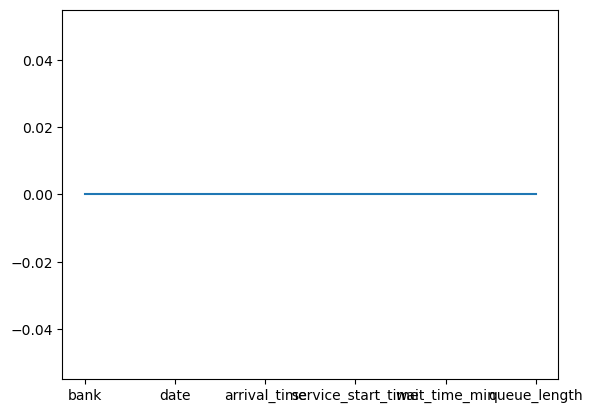

In [6]:
df_bank.isnull().sum().plot()

In [7]:
import pandas as pd
import random
from datetime import datetime

# --- Setup ---
hospitals = [
    "Dhaka Medical",
    "Square Hospital",
    "Apollo Hospital",
    "Ibn Sina",
    "Popular Diagnostic",
]
departments = {"General": 10, "Emergency": 5, "Pediatrics": 8, "Cardiology": 12}
days_of_week = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday"]
weather_choices = ["Clear", "Rainy"]


def simulate_patient():
    hospital = random.choice(hospitals)
    department = random.choice(list(departments.keys()))
    arrival_hour = random.randint(8, 17)
    arrival_minute = random.randint(0, 59)
    arrival_time = f"{arrival_hour:02d}:{arrival_minute:02d}"
    dow = random.choice(days_of_week)
    queue_length = random.randint(0, 30)
    is_emergency = department == "Emergency"
    weather = random.choices(weather_choices, weights=[0.7, 0.3])[0]

    # Simulate wait time
    base = queue_length * random.uniform(1.0, 1.5)
    if dow == "Thursday":
        base *= 1.2
    if weather == "Rainy":
        base *= 1.15
    if is_emergency:
        base *= random.uniform(0.6, 1.2)
    total_wait = round(base + departments[department] + random.uniform(-2, 2), 2)

    return {
        "hospital_name": hospital,
        "department": department,
        "arrival_time": arrival_time,
        "day_of_week": dow,
        "queue_length": queue_length,
        "is_emergency": "Yes" if is_emergency else "No",
        "weather_condition": weather,
        "wait_time_min": total_wait,
    }


# Generate and export
hospital_data = [simulate_patient() for _ in range(1000)]
df_hospital = pd.DataFrame(hospital_data)
#df_hospital.to_csv("../data/raw/hospital_wait_time.csv", index=False)

In [8]:
df_hospital.head()

,hospital_name,department,arrival_time,day_of_week,queue_length,is_emergency,weather_condition,wait_time_min
0,Ibn Sina,Cardiology,09:29,Sunday,20,No,Clear,33.56
1,Popular Diagnostic,General,12:48,Wednesday,12,No,Clear,22.20
2,Popular Diagnostic,Emergency,08:00,Tuesday,10,Yes,Rainy,18.23
3,Ibn Sina,Cardiology,11:54,Tuesday,19,No,Clear,32.02
4,Square Hospital,Emergency,16:20,Thursday,5,Yes,Clear,11.73


In [9]:
import random
import pandas as pd

places = [
    "Lalbagh Fort",
    "Ahsan Manzil",
    "National Zoo",
    "National Museum",
    "Liberation War Museum",
]
seasons = ["Summer", "Winter", "Monsoon"]
weather_options = ["Clear", "Rainy"]
days = ["Friday", "Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday"]


def simulate_visitor():
    place = random.choice(places)
    dow = random.choice(days)
    season = random.choices(seasons, weights=[0.4, 0.3, 0.3])[0]
    weather = random.choices(weather_options, weights=[0.7, 0.3])[0]
    hour = random.randint(8, 18)
    minute = random.randint(0, 59)
    arrival = f"{hour:02d}:{minute:02d}"

    # Holiday logic: Friday & Saturday are holidays
    holiday = "Yes" if dow in ["Friday", "Saturday"] else "No"

    queue = random.randint(0, 50)

    base = queue * random.uniform(0.8, 1.3)

    # Increase crowd on holidays (Friday, Saturday)
    if holiday == "Yes":
        base *= 1.5
        # More crowd in evening (4pm-6pm)
        if hour >= 16:
            base *= 1.3

    # Slightly less crowd on monsoon rainy days
    if season == "Monsoon" and weather == "Rainy":
        base *= 0.9

    wait = round(base + random.uniform(0, 5), 2)

    return {
        "place_name": place,
        "day_of_week": dow,
        "arrival_time": arrival,
        "season": season,
        "weather": weather,
        "school_holiday": holiday,
        "queue_length": queue,
        "wait_time_min": wait,
    }


# Generate and export
park_data = [simulate_visitor() for _ in range(1000)]
df_park = pd.DataFrame(park_data)
#df_park.to_csv("../data/raw/parks_wait_time.csv", index=False)

In [10]:
df_park.head()

,place_name,day_of_week,arrival_time,season,weather,school_holiday,queue_length,wait_time_min
0,National Museum,Thursday,08:14,Monsoon,Clear,No,7,8.62
1,Ahsan Manzil,Saturday,13:33,Summer,Clear,Yes,33,51.61
2,Lalbagh Fort,Sunday,11:27,Monsoon,Clear,No,30,32.92
3,National Museum,Saturday,11:45,Winter,Clear,Yes,7,13.97
4,Liberation War Museum,Thursday,13:22,Monsoon,Clear,No,39,42.85
